# BOOKS RECOMMENDATION SYSTEM

## 📍 **Introduction**:

⏩ This project uses recomendation system techniques for personalizing books suggestions or recommendations to users


📌 **What is Recommendation System?**

    Algorithm that provides personalized suggestions or recommendations to users

📌 **Types of Recommendation System?**

*   Content-Based Filtering
*   Collaborative Filtering

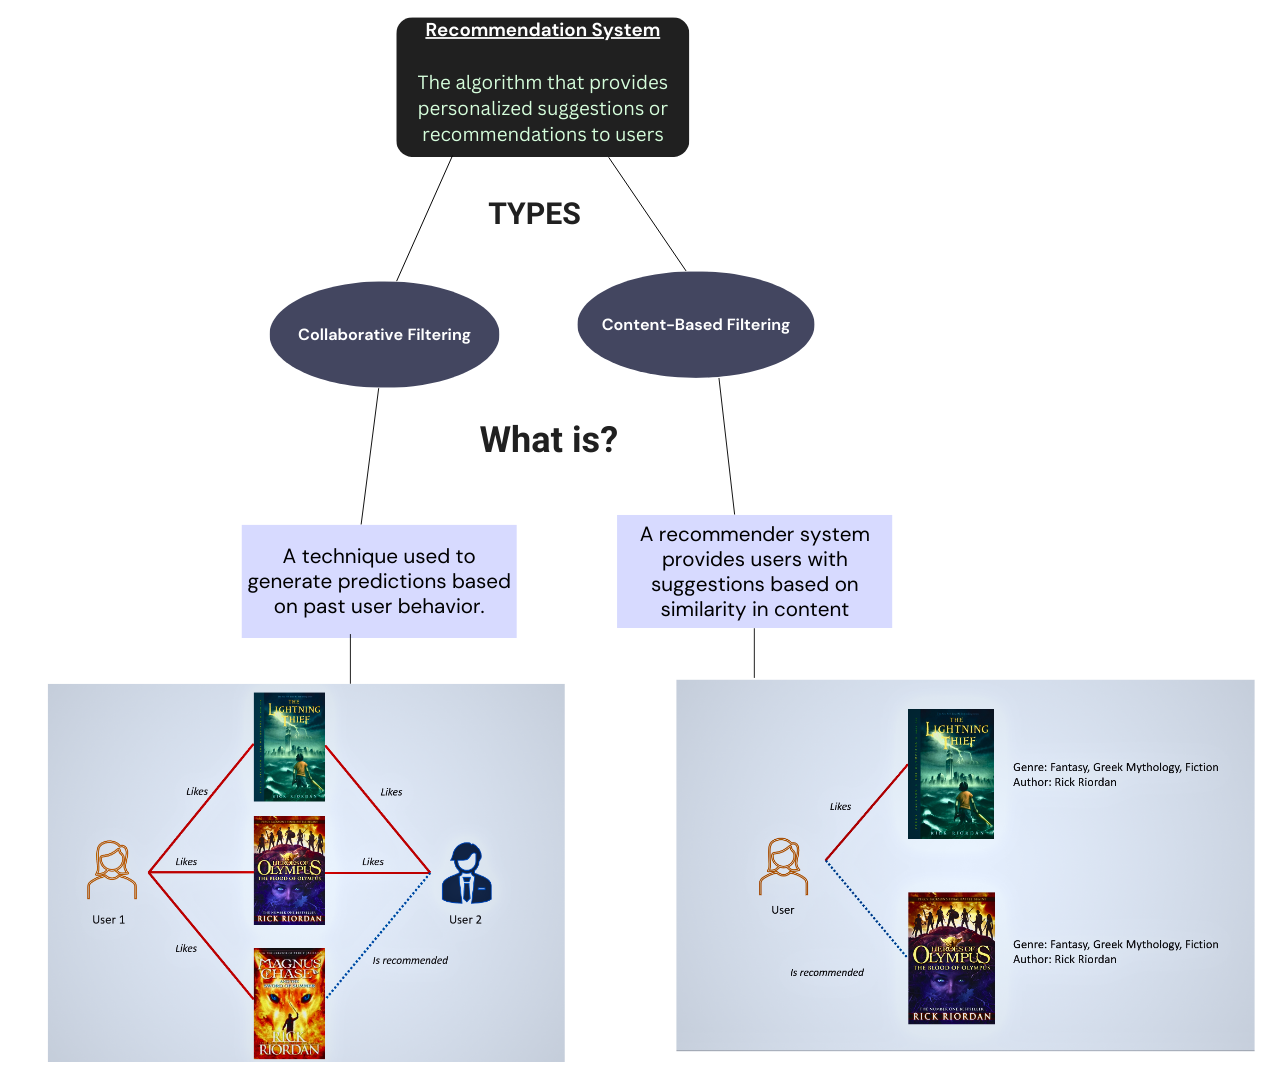

🛠 Packages and Installation:


* 📦   Pandas: pip install pandas
* 📦 Scikit-Learn: pip install scikit-learn






In [2]:
# !pip install pandas
# !pip install scikit-learn

## Let'us get started!

In [3]:
# Importing Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Reading Data
df = pd.read_csv('Books.csv', header=0, on_bad_lines='skip', encoding='latin-1', sep=',', low_memory=False)

In [5]:
# Showing the head of data
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Take note that the dataset encompasses details about various books, including information about the **author**, **publisher**, and **title** of each book. Utilizing this dataset, **we aim to construct a recommendation system that can provide personalized suggestions to users regarding their next reading choices**. The system will analyze the user's current book preferences to offer tailored recommendations for an enhanced reading experience.

In [6]:
# Take a look at the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


The aforementioned dataframe consists of more than 202K rows of data. To construct the recommender system, we will opt for a random sample of 20,000 rows. This sampling approach is chosen to mitigate memory consumption issues, as processing an extensive dataset may overwhelm the system's memory and lead to performance slowdowns.

## Data Preprocessing

### 🗑 Removing Duplicates

In [7]:
print("Number of Duplicated Values = %i " % df.duplicated(subset='Book-Title').sum())

Number of Duplicated Values = 29225 


In [8]:
# Removing Duplicates
df = df.drop_duplicates(subset='Book-Title')

In [9]:
# Check if there are duplicated values in Book-Title column
print("Number of Duplicated Values = %i " % df.duplicated(subset='Book-Title').sum())

Number of Duplicated Values = 0 


### 🔴 Taking a Random Sample

In [10]:
r_df = df.sample(n=20000, replace=False, random_state=320)

In [11]:
r_df.reset_index(drop=True, inplace=True)

In [12]:
r_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0451450469,"Sunder, Eclipse and Seed",Elyse Guttenberg,1990,New Amer Library,http://images.amazon.com/images/P/0451450469.0...,http://images.amazon.com/images/P/0451450469.0...,http://images.amazon.com/images/P/0451450469.0...
1,0451453565,The Hollowing (Mythago Cycle),Robert Holdstock,1995,Roc,http://images.amazon.com/images/P/0451453565.0...,http://images.amazon.com/images/P/0451453565.0...,http://images.amazon.com/images/P/0451453565.0...
2,1853260371,Lord Jim (Wordsworth Collection),Joseph Conrad,1998,NTC/Contemporary Publishing Company,http://images.amazon.com/images/P/1853260371.0...,http://images.amazon.com/images/P/1853260371.0...,http://images.amazon.com/images/P/1853260371.0...
3,0066212545,The House of Blue Mangoes: A Novel,David Davidar,2002,HarperCollins Publishers,http://images.amazon.com/images/P/0066212545.0...,http://images.amazon.com/images/P/0066212545.0...,http://images.amazon.com/images/P/0066212545.0...
4,0449912272,Contemporary American Short Stories,Douglas Angus,1996,Fawcett Books,http://images.amazon.com/images/P/0449912272.0...,http://images.amazon.com/images/P/0449912272.0...,http://images.amazon.com/images/P/0449912272.0...


### 🗑 Data Cleaining

In [13]:
num_missings = r_df.isna().sum().sum()
if num_missings == 0:
  print("No missing values...")
else:
  print(f"Number missing values = {num_missings}")

Number missing values = 1



Prior to transforming the data into a word vector, a preliminary cleaning step is essential. Initially, we'll eliminate whitespaces from the "Book-Author" column. Failing to perform this cleaning could result in CountVectorizer treating the authors' first and last names as distinct words during the vectorization process.

In [14]:
# Save a copy of the original DF
cp_df = r_df.copy()

In [15]:
# Now replace each space between the First and Last name in Book-Author column with non-space
r_df['Book-Author'] = r_df['Book-Author'].apply(lambda x: str(x).replace(" ", "").lower())

In [16]:
r_df['Book-Author'].head()

0    elyseguttenberg
1    robertholdstock
2       josephconrad
3       daviddavidar
4       douglasangus
Name: Book-Author, dtype: object

In [17]:
# Convert the below columns to lowercase
r_df['Book-Title'] = r_df['Book-Title'].str.lower()
r_df['Publisher'] = r_df['Publisher'].str.lower()

In [18]:
# Dropping Uneeded columns and merging the important 3 columns into single variable
r_df = r_df.drop(columns=['ISBN','Image-URL-S','Image-URL-M','Image-URL-L','Year-Of-Publication'])

r_df["data"] = r_df[r_df.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [19]:
r_df[['data']].head()

,data
0,elyseguttenberg new amer library
1,robertholdstock roc
2,josephconrad ntc/contemporary publishing company
3,daviddavidar harpercollins publishers
4,douglasangus fawcett books


### Vectorize the Dataframe

#### CountVectorizer: A class help in converting a collection of documents into a vector of word counts

In [20]:
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(r_df['data'])

### Building the Recommendation System

Next, we will employ a distance metric known as cosine similarity to assess the similarity between each bag-of-words. Cosine similarity measures the cosine of the angle between two or more vectors, indicating whether they align in the same direction.

The cosine similarity score falls within the range of 0 to 1. A score of 0 signifies no similarity between the vectors, whereas a score of 1 implies complete identity.

In [21]:
similarities = cosine_similarity(vectorized)

In [22]:
similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
final_df = pd.DataFrame(similarities, columns=r_df['Book-Title'], index=r_df['Book-Title']).reset_index()

final_df.head()

Book-Title,Book-Title,"sunder, eclipse and seed",the hollowing (mythago cycle),lord jim (wordsworth collection),the house of blue mangoes: a novel,contemporary american short stories,the stand-in: a novel,"hexen, hobbits und piraten. die besten bã?ãâ¼cher fã?ãâ¼r kinder.",el si de las ninas,die auserwã?ãâ¤hlte 1. die geheimnisse des nachtpalais.,...,gabriel's lady,the vine of desire,astronomia: guia del cielo nocturno,faberge: imperial jeweler,incredible words &amp; pictures: great hunters,clifford's christmas (clifford the big red dog (paperback)),finding your perfect mate,paragon walk,meet the stars of popular,henny penny (a read along with me book)
0,"sunder, eclipse and seed",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,the hollowing (mythago cycle),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,lord jim (wordsworth collection),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,the house of blue mangoes: a novel,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.288675,0.000000,0.0,0.0
4,contemporary american short stories,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0


Observe that we have converted the similarity vector into a dataframe with book titles listed vertically and horizontally. The dataframe values represent the cosine similarity between different books.

Also, notice that the diagonal is always 1.0, since it displays the similarity of each book with itself.

## Displaying User Recommendations

Finally, let’s use the dataframe above to display book recommendations. If a book is entered as input, the top 10 similar books must be returned.

In [27]:
input_book = 'contemporary american short stories'
recommendations = pd.DataFrame(final_df.nlargest(11,input_book)['Book-Title'])
recommendations = recommendations[recommendations['Book-Title']!=input_book]
print(recommendations)

                                             Book-Title
44                                             jewelene
608                                           dead cert
855                          murder in gray &amp; white
1117  murder on capitol hill (capital crimes (paperb...
1160                                    knave of hearts
1177                                       short friday
1457                                   uncertain voyage
1483                                   seasons of death
1549                          the amazing mrs. pollifax
1679                                        bullet hole


**We have successfully built a recommendation system from scratch with Python.**